<a href="https://colab.research.google.com/github/anujsaxena/Python/blob/main/nlu_tut_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLU Sentiment analysis**


In [6]:
!wget https://setup.johnsnowlabs.com/nlu/colab.sh -O - | bash
import os
! apt-get update -qq > /dev/null   
# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

import nlu

--2022-01-03 12:27:40--  https://setup.johnsnowlabs.com/nlu/colab.sh
Resolving setup.johnsnowlabs.com (setup.johnsnowlabs.com)... 51.158.130.125
Connecting to setup.johnsnowlabs.com (setup.johnsnowlabs.com)|51.158.130.125|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh [following]
--2022-01-03 12:27:41--  https://raw.githubusercontent.com/JohnSnowLabs/nlu/master/scripts/colab_setup.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1662 (1.6K) [text/plain]
Saving to: ‘STDOUT’

-                   100%[===================>]   1.62K  --.-KB/s    in 0s      

2022-01-03 12:27:41 (28.6 MB/s) - written to stdout [1662/1662]

Installing  NLU 

In [14]:
!pip install spark-nlp==3.3.4

In [ ]:
import nlu
import pandas as pd
df = pd.read_csv('Tweets.csv')
df


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


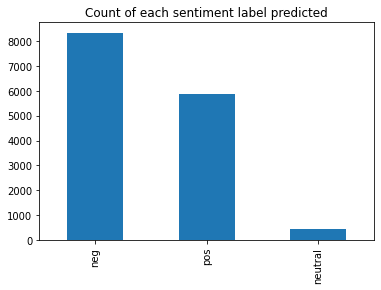

In [ ]:
sentiment_predictions = nlu.load('sentiment').predict(df, output_level='document')
sentiment_predictions['sentiment'].value_counts().plot.bar(title='Count of each sentiment label predicted')

In [ ]:
sentiment_predictions

,airline,airline_sentiment,airline_sentiment_confidence,airline_sentiment_gold,document,name,negativereason,negativereason_confidence,negativereason_gold,retweet_count,sentiment,sentiment_confidence,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,Virgin America,neutral,1.0000,NaN,@VirginAmerica What @dhepburn said.,cairdin,NaN,NaN,NaN,0,neg,0.998271,NaN,2015-02-24 11:35:52 -0800,570306133677760513,NaN,Eastern Time (US & Canada)
1,Virgin America,positive,0.3486,NaN,@VirginAmerica plus you've added commercials t...,jnardino,NaN,0.0000,NaN,0,neg,0.989572,NaN,2015-02-24 11:15:59 -0800,570301130888122368,NaN,Pacific Time (US & Canada)
2,Virgin America,neutral,0.6837,NaN,@VirginAmerica I didn't today... Must mean I n...,yvonnalynn,NaN,NaN,NaN,0,pos,0.976107,NaN,2015-02-24 11:15:48 -0800,570301083672813571,Lets Play,Central Time (US & Canada)
3,Virgin America,negative,1.0000,NaN,@VirginAmerica it's really aggressive to blast...,jnardino,Bad Flight,0.7033,NaN,0,neg,0.952606,NaN,2015-02-24 11:15:36 -0800,570301031407624196,NaN,Pacific Time (US & Canada)
4,Virgin America,negative,1.0000,NaN,@VirginAmerica and it's a really big bad thing...,jnardino,Can't Tell,1.0000,NaN,0,neg,0.999844,NaN,2015-02-24 11:14:45 -0800,570300817074462722,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,American,positive,0.3487,NaN,@AmericanAir thank you we got on a different f...,KristenReenders,NaN,0.0000,NaN,0,pos,0.999964,NaN,2015-02-22 12:01:01 -0800,569587686496825344,NaN,NaN
14636,American,negative,1.0000,NaN,@AmericanAir leaving over 20 minutes Late Flig...,itsropes,Customer Service Issue,1.0000,NaN,0,neg,0.999909,NaN,2015-02-22 11:59:46 -0800,569587371693355008,Texas,NaN
14637,American,neutral,1.0000,NaN,@AmericanAir Please bring American Airlines to...,sanyabun,NaN,NaN,NaN,0,pos,0.984736,NaN,2015-02-22 11:59:15 -0800,569587242672398336,"Nigeria,lagos",NaN
14638,American,negative,1.0000,NaN,"@AmericanAir you have my money, you change my ...",SraJackson,Customer Service Issue,0.6659,NaN,0,pos,0.999448,NaN,2015-02-22 11:59:02 -0800,569587188687634433,New Jersey,Eastern Time (US & Canada)


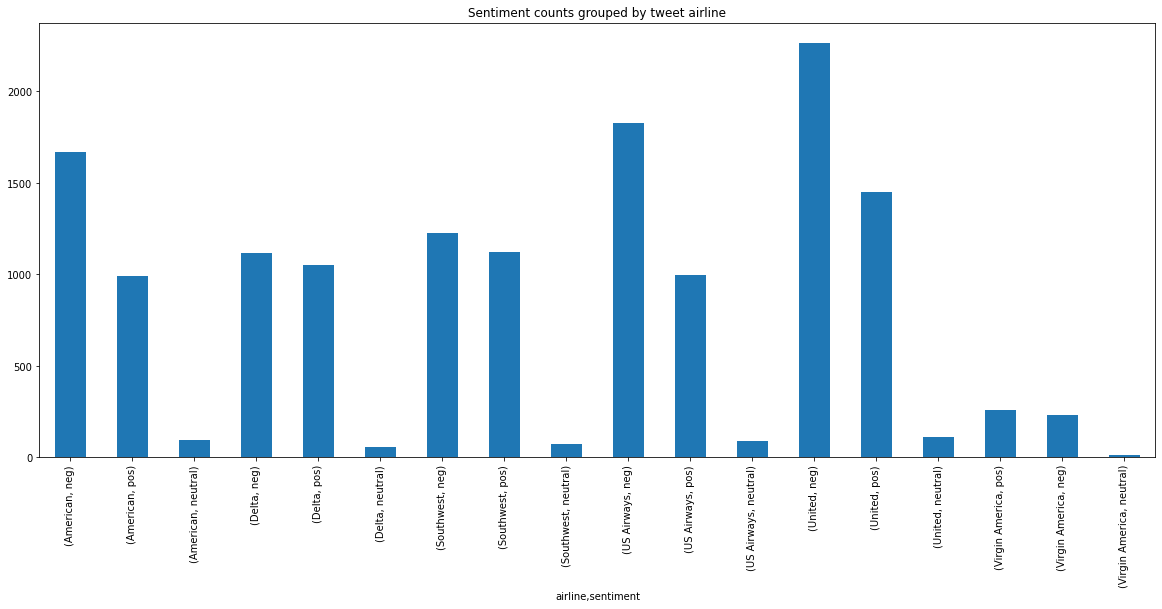

In [ ]:
sentiment_predictions.groupby('airline')['sentiment'].value_counts().plot.bar(figsize=(20,8), title = 'Sentiment counts grouped by tweet airline')

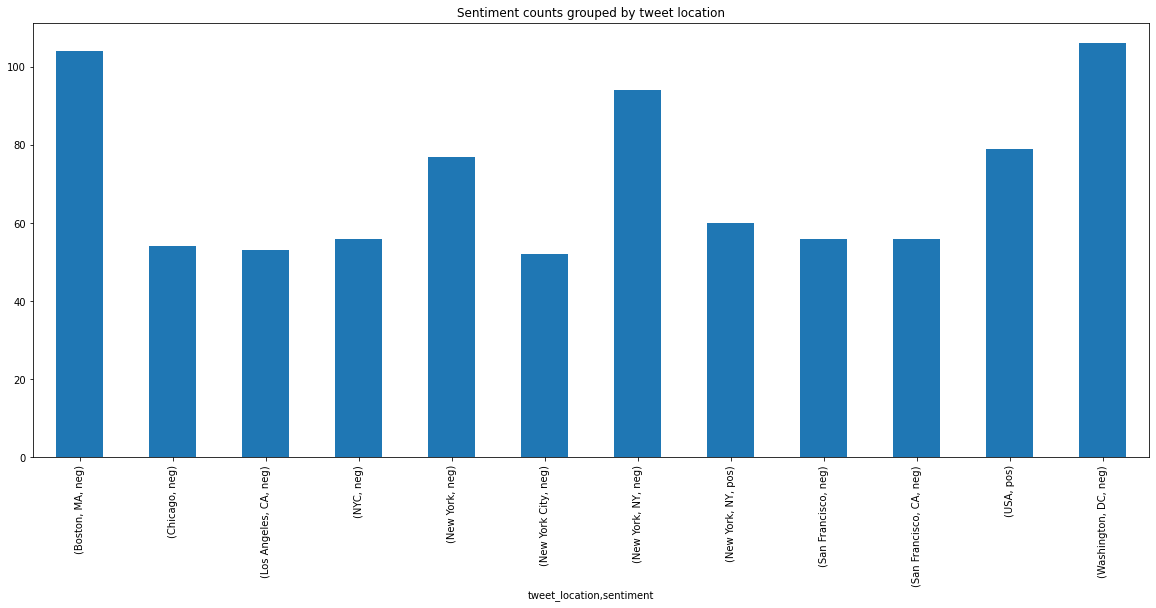

In [ ]:
counts  = sentiment_predictions.groupby('tweet_location')['sentiment'].value_counts()

counts[counts>50].plot.bar(figsize=(20,8), title = 'Sentiment counts grouped by tweet location')

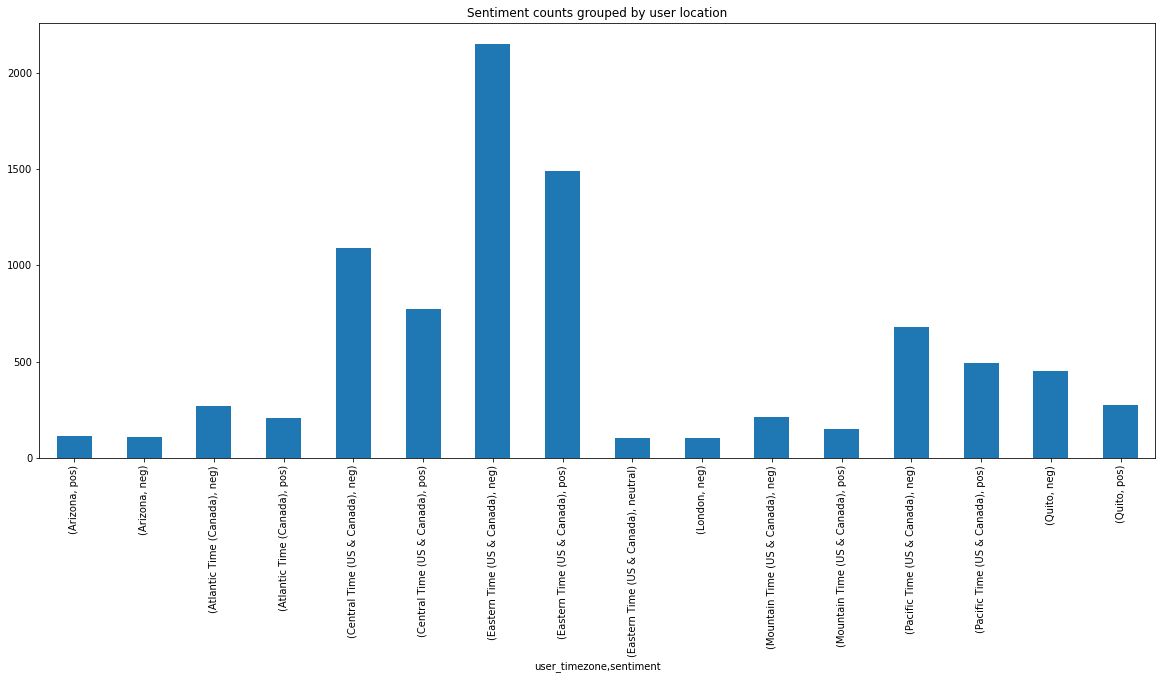

In [ ]:
counts = sentiment_predictions.groupby('user_timezone')['sentiment'].value_counts()
counts[counts>100].plot.bar(figsize=(20,8), title='Sentiment counts grouped by user location')

In [4]:
import pandas as pd
df2 = pd.read_csv('Covid_Val.csv')
df2

,Unnamed: 0,Tweet Text,Polarity,Poll,Class
0,0,RT @AZDHS: Today’s #COVID19 dashboard update a...,-1,Negative,MI
1,1,RT @Jim_Jordan: Joe Biden said he’d defeat #CO...,-1,Negative,MI
2,2,"RT @MaLanterne: Vintage Ship in a Bottle, Set ...",-1,Negative,MI
3,3,RT @DrEricDing: ⚠️KIDS &amp; YOUNG ADULTS DYIN...,-1,Negative,MI
4,4,RT @Iran_GOV: #Iran’s Health Ministry announce...,-1,Negative,MI
...,...,...,...,...,...
95,95,A pastor is still being held by officials in #...,1,Positive,MI
96,96,#SaudiArabia: non-oil private sector grew in S...,1,Positive,MI
97,97,RT @IPAOfficialPage: The Indian Pharmaceutical...,1,Positive,MI
98,98,RT @pfizer: UPDATE: We and @BioNTech_Group off...,1,Positive,MI


sentimentdl_glove_imdb download started this may take some time.
Approximate size to download 8.7 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
glove_100d download started this may take some time.
Approximate size to download 145.3 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]
Could not find text col in df. Using origin_index col istead


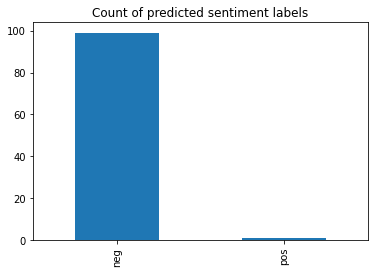

In [7]:
sentiment_predictions = nlu.load('sentiment').predict(df2,output_level='document')
sentiment_predictions['sentiment'].value_counts().plot.bar(title='Count of predicted sentiment labels')

In [8]:
sentiment_predictions

,Class,Polarity,Poll,Tweet Text,document,sentence_embedding_,sentiment,sentiment_confidence,text,word_embedding_glove_100d
0,MI,-1,Negative,RT @AZDHS: Today’s #COVID19 dashboard update a...,0,"[-0.6149100065231323, 0.9273399710655212, 0.55...",pos,0.999997,0,"[[-0.6149100065231323, 0.9273399710655212, 0.5..."
1,MI,-1,Negative,RT @Jim_Jordan: Joe Biden said he’d defeat #CO...,1,"[-0.32218998670578003, 0.6463199853897095, 0.0...",neg,0.999798,1,"[[-0.32218998670578003, 0.6463199853897095, 0...."
2,MI,-1,Negative,"RT @MaLanterne: Vintage Ship in a Bottle, Set ...",2,"[-0.386790007352829, 0.6123300194740295, 0.147...",neg,0.648752,2,"[[-0.386790007352829, 0.6123300194740295, 0.14..."
3,MI,-1,Negative,RT @DrEricDing: ⚠️KIDS &amp; YOUNG ADULTS DYIN...,3,"[-0.25812000036239624, 0.43088001012802124, 0....",neg,0.999189,3,"[[-0.25812000036239624, 0.43088001012802124, 0..."
4,MI,-1,Negative,RT @Iran_GOV: #Iran’s Health Ministry announce...,4,"[-0.23317000269889832, 0.36893001198768616, 0....",neg,0.981648,4,"[[-0.23317000269889832, 0.36893001198768616, 0..."
...,...,...,...,...,...,...,...,...,...,...
95,MI,1,Positive,A pastor is still being held by officials in #...,95,"[-0.5263000130653381, 0.32014000415802, 0.7422...",neg,0.999893,95,"[[-0.5263000130653381, 0.32014000415802, 0.742..."
96,MI,1,Positive,#SaudiArabia: non-oil private sector grew in S...,96,"[-0.2956399917602539, 0.7582299709320068, 0.54...",neg,0.998753,96,"[[-0.2956399917602539, 0.7582299709320068, 0.5..."
97,MI,1,Positive,RT @IPAOfficialPage: The Indian Pharmaceutical...,97,"[-0.32747000455856323, 0.2186499983072281, 0.6...",neg,0.999998,97,"[[-0.32747000455856323, 0.2186499983072281, 0...."
98,MI,1,Positive,RT @pfizer: UPDATE: We and @BioNTech_Group off...,98,"[-0.3261600136756897, 0.4462699890136719, 0.67...",neg,0.999994,98,"[[-0.3261600136756897, 0.4462699890136719, 0.6..."


classifierdl_use_emotion download started this may take some time.
Approximate size to download 21.3 MB
[OK!]
tfhub_use download started this may take some time.
Approximate size to download 923.7 MB
[OK!]
sentence_detector_dl download started this may take some time.
Approximate size to download 354.6 KB
[OK!]


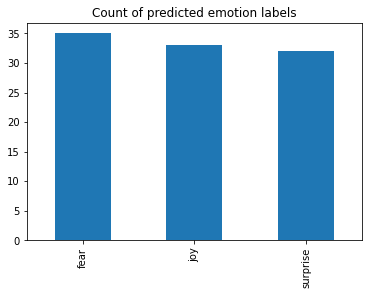

In [9]:
sentiment_predictions = nlu.load('emotion').predict(df2,output_level='document')
sentiment_predictions['emotion'].value_counts().plot.bar(title='Count of predicted emotion labels')

In [10]:
sentiment_predictions

,Class,Polarity,Poll,Tweet Text,document,emotion,emotion_confidence_confidence,sentence_embedding_use,text
0,MI,-1,Negative,RT @AZDHS: Today’s #COVID19 dashboard update a...,0,surprise,0.999989,"[-0.010802606120705605, -0.04791344329714775, ...",0
1,MI,-1,Negative,RT @Jim_Jordan: Joe Biden said he’d defeat #CO...,1,surprise,0.999924,"[-0.015034398064017296, 0.01586589775979519, 0...",1
2,MI,-1,Negative,"RT @MaLanterne: Vintage Ship in a Bottle, Set ...",2,surprise,0.999691,"[-0.0028952702414244413, 0.008062592707574368,...",2
3,MI,-1,Negative,RT @DrEricDing: ⚠️KIDS &amp; YOUNG ADULTS DYIN...,3,surprise,0.999546,"[-0.01076279953122139, 0.00972261093556881, -0...",3
4,MI,-1,Negative,RT @Iran_GOV: #Iran’s Health Ministry announce...,4,surprise,0.988714,"[-0.005049453116953373, -0.007040337659418583,...",4
...,...,...,...,...,...,...,...,...,...
95,MI,1,Positive,A pastor is still being held by officials in #...,95,fear,0.618862,"[0.003674045205116272, -0.03701842203736305, -...",95
96,MI,1,Positive,#SaudiArabia: non-oil private sector grew in S...,96,joy,0.839134,"[0.00434663612395525, -0.005873069167137146, -...",96
97,MI,1,Positive,RT @IPAOfficialPage: The Indian Pharmaceutical...,97,fear,0.977443,"[0.030084626749157906, -0.001202839775942266, ...",97
98,MI,1,Positive,RT @pfizer: UPDATE: We and @BioNTech_Group off...,98,joy,0.531588,"[-0.008710630238056183, -0.0234679002314806, -...",98
